# Data Analysis

In [1]:
# enable auto reload
%load_ext autoreload
%autoreload 2

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
RAW_PATH = './data'            # path to raw data
NP_PATH = './preprocessed'     # path to preprocessed data
FRAME_LEN = 1024               # length of one data frame
FRAME_INTV = 512               # interval between data frames

In [6]:
if not os.path.exists(NP_PATH):
    os.mkdir(NP_PATH)

In [7]:
from src.utils.data_utils import get_preprocessed_data

## load preprocessed data
DATA, train_idx, test_idx, trainY, testY, train_diameter, test_diameter, train_rpm, test_rpm = get_preprocessed_data(RAW_PATH, NP_PATH, FRAME_LEN, FRAME_INTV)

print('DATA :\t\t', DATA.shape)
print('train_idx :\t', train_idx.shape)
print('test_idx :\t', test_idx.shape)
print('trainY :\t', trainY.shape)
print('testY :\t\t', testY.shape)
print('train_diameter :', train_diameter.shape)
print('test_diameter :\t', test_diameter.shape)
print('train_rpm :\t', train_rpm.shape)
print('test_rpm :\t', test_rpm.shape)

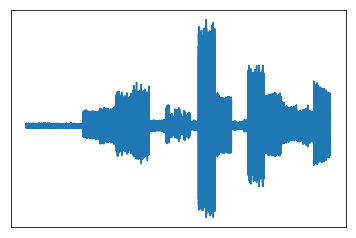

In [8]:
%matplotlib notebook

## remove ticks
plt.xticks([])
plt.yticks([])

## plot DATA
plt.plot(DATA)
plt.show()

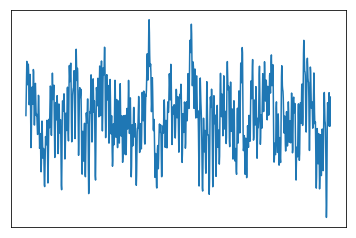

In [9]:
%matplotlib notebook

## define I
I = 0

## remove ticks
plt.xticks([])
plt.yticks([])

## plot I'th train frame
plt.plot(DATA[train_idx[I]:train_idx[I]+FRAME_LEN])
plt.show()

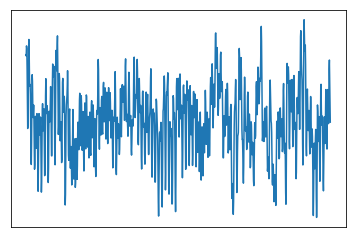

In [10]:
%matplotlib notebook

## define I
I = 0

## remove ticks
plt.xticks([])
plt.yticks([])

## plot I'th test frame
plt.plot(DATA[test_idx[I]:test_idx[I]+FRAME_LEN])
plt.show()

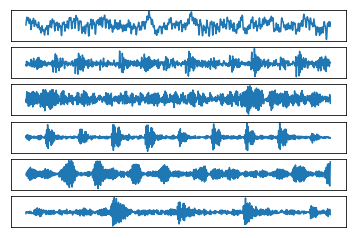

In [11]:
%matplotlib notebook

## define I
I = 0

## iterate y for 6 labels
for y in range(6):
    ## idx_labeled_y : train indices who have label y
    idx_labeled_y = train_idx[trainY==y]
    
    ## let's plot on y'th subplot
    ax = plt.subplot(6,1,y+1)
    
    ## remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    ## plot I'th frame of idx_labeled_y
    ax.plot(DATA[idx_labeled_y[I]:idx_labeled_y[I]+FRAME_LEN])
plt.show()

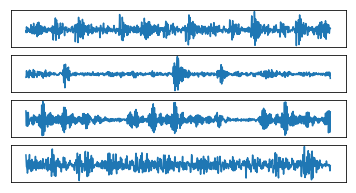

In [12]:
%matplotlib notebook

## define I and y
I=0
y=1

## iterate d for diameter range
for d in range(1,5):
    ## idx_diameter_d : train indices who have label y, diameter d
    idx_diameter_d = train_idx[(trainY==y)&(train_diameter==d)]
    
    ## let's plot on d'th subplot
    ax = plt.subplot(5,1,d+1)
    
    ## remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    ## plot I'th frame of idx_diameter_d
    ax.plot(DATA[idx_diameter_d[I]:idx_diameter_d[I]+FRAME_LEN])
plt.show()

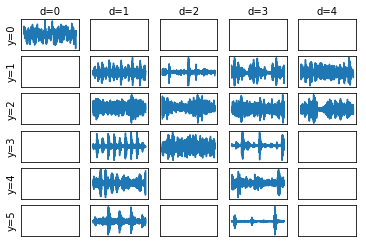

In [13]:
%matplotlib notebook

## define I
I = 0

## iterate y for all labels, d for all diameters
for y in range(6):
    for d in range(5):
        ## let's plot on (y,d)'th subplot
        ax = plt.subplot(6,5,5*y+d+1)
        
        ## write labels on axis
        if y==0:
            ax.set_xlabel('d=%d'%d)
            ax.xaxis.set_label_position('top')
        if d==0:
            ax.set_ylabel('y=%d'%y)
            
        ## remove ticks
        ax.set_xticks([])
        ax.set_yticks([])
        
        ## idx_oi : train indices who have label y, diameter d
        idx_oi = train_idx[(trainY==y)&(train_diameter==d)]
        
        ## pass if there is no data for (y,d)
        if idx_oi.shape[0]==0:
            continue
        
        ## plot I'th data of idx_oi
        ax.plot(DATA[idx_oi[I]:idx_oi[I]+FRAME_LEN])
    
plt.show()